In [ ]:
!pip install pycountry-convert
#dataset = https://www.kaggle.com/unsdsn/world-happiness

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pycountry_convert as pc
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Text(0.5, 0, 'Generosity')

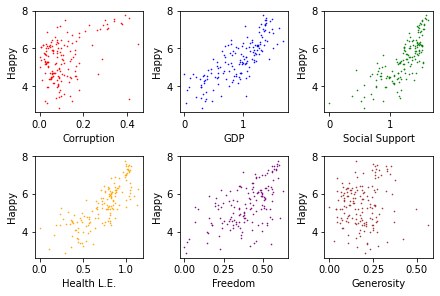

In [ ]:
happy = df['Score']
GDP = df['GDP per capita']
ss = df['Social support']
health = df['Healthy life expectancy']
generosity = df['Generosity']
freedom = df['Freedom to make life choices']

corruption = df['Perceptions of corruption']


width = 0.35

fig2 = plt.figure(constrained_layout=True)

spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# Happy 
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax1.scatter(corruption, happy, width, color='red')
f2_ax1.set_xlabel('Corruption')
f2_ax1.set_ylabel('Happy')

# GPD
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax2.scatter(GDP,happy, width, color='blue')
f2_ax2.set_ylabel('Happy')
f2_ax2.set_xlabel('GDP')

# Social Support
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax3.scatter(ss,happy, width, color='green')
f2_ax3.set_ylabel('Happy')
f2_ax3.set_xlabel('Social Support')


# Healthy life expectancy
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax4.scatter(health,happy, width, color='orange')
f2_ax4.set_ylabel('Happy')
f2_ax4.set_xlabel('Health L.E.')


# Freedom to make life choices
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax5.scatter(freedom,happy, width, color='purple')
f2_ax5.set_ylabel('Happy')
f2_ax5.set_xlabel('Freedom')

# Generosity
f2_ax6 = fig2.add_subplot(spec2[1, 2])
f2_ax6.scatter(generosity,happy, width, color='brown')
f2_ax6.set_ylabel('Happy')
f2_ax6.set_xlabel('Generosity')

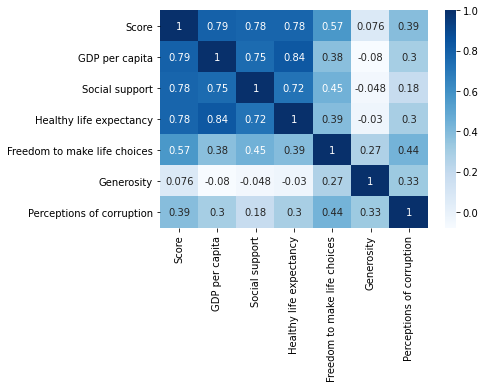

In [ ]:
data = df.iloc[:,1:]
corrMatrix = data.corr()
sn.heatmap(corrMatrix, cmap = 'Blues', annot = True)
plt.show()

## Graficas Happy

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
country_code = pc.country_name_to_country_alpha2("Panama", cn_name_format="default")
continent_name = pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_code))
continent_name

'North America'

In [ ]:
def get_continent(country):
  try :
    country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    continent_name = pc.convert_continent_code_to_continent_name(
                                      pc.country_alpha2_to_continent_code(country_code)
                                      )
    return continent_name
  except:
    return None

df['Continent'] = df['Country or region'].apply(get_continent)

In [ ]:
df = df[['Overall rank', 'Country or region','Continent', 'Perceptions of corruption', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity','Score'
       ]]

In [ ]:
df[df['Continent'].isna()]

,Overall rank,Country or region,Continent,Perceptions of corruption,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Score
38,39,Trinidad & Tobago,None,0.016,1.231,1.477,0.713,0.489,0.185,6.192
45,46,Kosovo,None,0.006,0.882,1.232,0.758,0.489,0.262,6.100
102,103,Congo (Brazzaville),None,0.093,0.673,0.799,0.508,0.372,0.105,4.812
109,110,Palestinian Territories,None,0.066,0.657,1.247,0.672,0.225,0.103,4.696
126,127,Congo (Kinshasa),None,0.053,0.094,1.125,0.357,0.269,0.212,4.418


In [ ]:
df[df['Continent']=="North America"]

,Overall rank,Country or region,Continent,Perceptions of corruption,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Score
8,9,Canada,North America,0.308,1.365,1.505,1.039,0.584,0.285,7.278
11,12,Costa Rica,North America,0.093,1.034,1.441,0.963,0.558,0.144,7.167
18,19,United States,North America,0.128,1.433,1.457,0.874,0.454,0.280,6.892
22,23,Mexico,North America,0.073,1.070,1.323,0.861,0.433,0.074,6.595
26,27,Guatemala,North America,0.078,0.800,1.269,0.746,0.535,0.175,6.436
30,31,Panama,North America,0.054,1.149,1.442,0.910,0.516,0.109,6.321
34,35,El Salvador,North America,0.074,0.794,1.242,0.789,0.430,0.093,6.253
44,45,Nicaragua,North America,0.127,0.694,1.325,0.835,0.435,0.200,6.105
55,56,Jamaica,North America,0.028,0.831,1.478,0.831,0.490,0.107,5.890
58,59,Honduras,North America,0.078,0.642,1.236,0.828,0.507,0.246,5.860


### Happy Vs GDP per capita

In [ ]:
# Corruption Vs GDP
X = df.iloc[:, [4, -1]].values

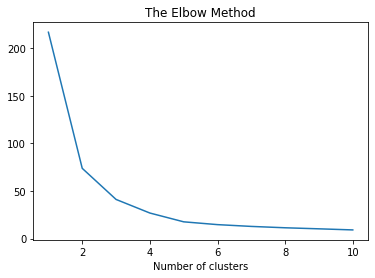

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

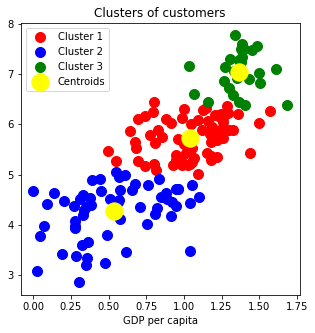

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('GDP per capita')

plt.legend()
plt.show()

In [ ]:
data_red_gdp =  df[df['Score'].isin(X[y_kmeans == 0, 1])]
data_blue_gdp = df[df['Score'].isin(X[y_kmeans == 1, 1])]
data_green_gdp = df[df['Score'].isin(X[y_kmeans == 2, 1])]

### Happy Vs GDP Social Support

In [ ]:
# Corruption Vs GDP
X = df.iloc[:, [5, -1]].values

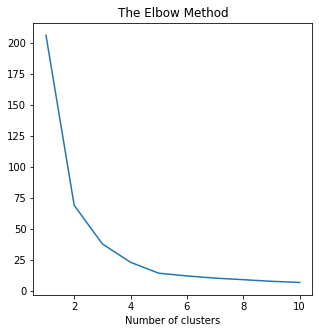

In [ ]:
from sklearn.cluster import KMeans
wcss = []
fig = plt.subplots(figsize=(5,5))

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

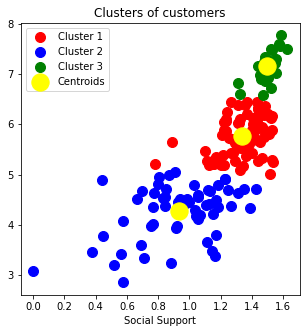

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Social Support')

plt.legend()
plt.show()

In [ ]:
data_red_ss =  df[df['Score'].isin(X[y_kmeans == 0, 1])]
data_blue_ss = df[df['Score'].isin(X[y_kmeans == 1, 1])]
data_green_ss = df[df['Score'].isin(X[y_kmeans == 2, 1])]

## Analisis de la Data

In [ ]:
#Table min and max values

gdp = {'Cluster': ['Blue Cluster','Red Cluster','Green Cluster'],
        'Min_GPD': [
                    round(np.nanmin(data_blue_gdp['Score']),2),
                    round(np.nanmin(data_red_gdp['Score']),2),
                    round(np.nanmin(data_green_gdp['Score']),2)
                    ],
        'Max_GPD': [
                   round(np.nanmax(data_blue_gdp['Score']),2),
                   round(np.nanmax(data_red_gdp['Score']),2),
                   round(np.nanmax(data_green_gdp['Score']),2)
                   ],
        'Amount_Country': [
                             len(data_blue_gdp),
                             len(data_red_gdp),
                             len(data_green_gdp)
                            ]
        }

ss = {'Cluster': ['Blue Cluster','Red Cluster','Green Cluster'],
        'Min_GPD': [
                    round(np.nanmin(data_blue_ss['Score']),2),
                    round(np.nanmin(data_red_ss['Score']),2),
                    round(np.nanmin(data_green_ss['Score']),2)
                    ],
        'Max_GPD': [
                   round(np.nanmax(data_blue_ss['Score']),2),
                   round(np.nanmax(data_red_ss['Score']),2),
                   round(np.nanmax(data_green_ss['Score']),2)
                   ],
        'Amount_Country': [
                             len(data_blue_ss),
                             len(data_red_ss),
                             len(data_green_ss)
                            ]
        }

df_gdp = pd.DataFrame(gdp, columns = ['Cluster','Min_GPD', 'Max_GPD', 'Amount_Country'])
df_ss = pd.DataFrame(ss, columns = ['Cluster','Min_GPD', 'Max_GPD', 'Amount_Country'])

#### Order by Country name

In [ ]:
data_blue_gdp.sort_values(by='Country or region',inplace=True)
data_red_gdp.sort_values(by='Country or region',inplace=True)
data_green_gdp.sort_values(by='Country or region',inplace=True)

data_blue_ss.sort_values(by='Country or region',inplace=True)
data_red_ss.sort_values(by='Country or region',inplace=True)
data_green_ss.sort_values(by='Country or region',inplace=True)

### Graph Countries by GDP

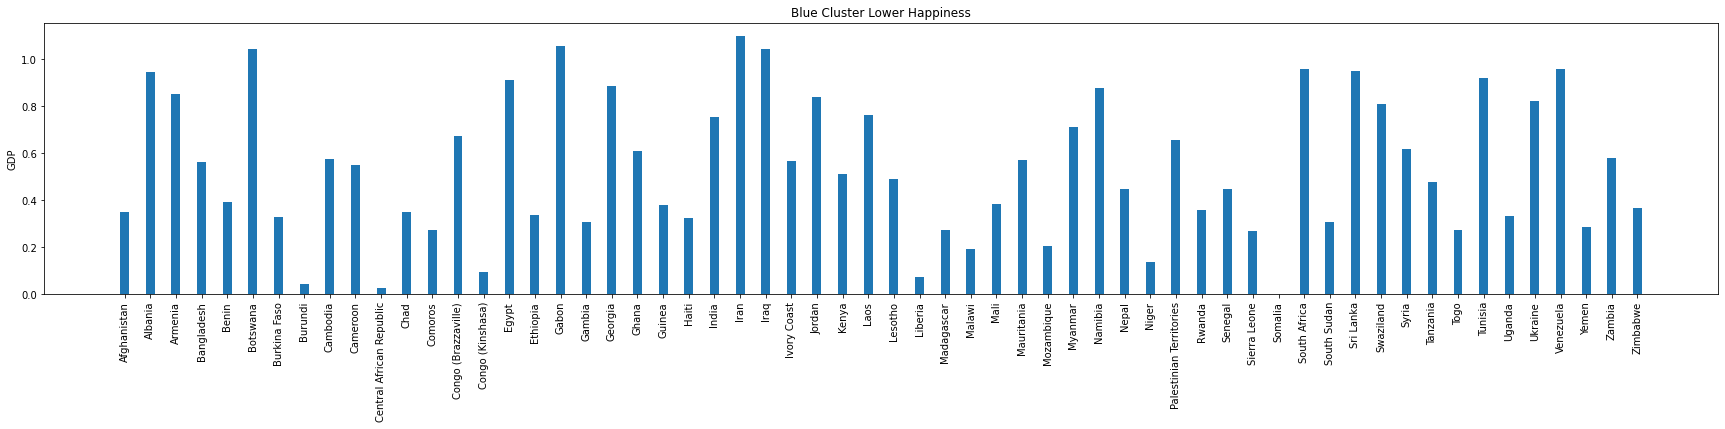

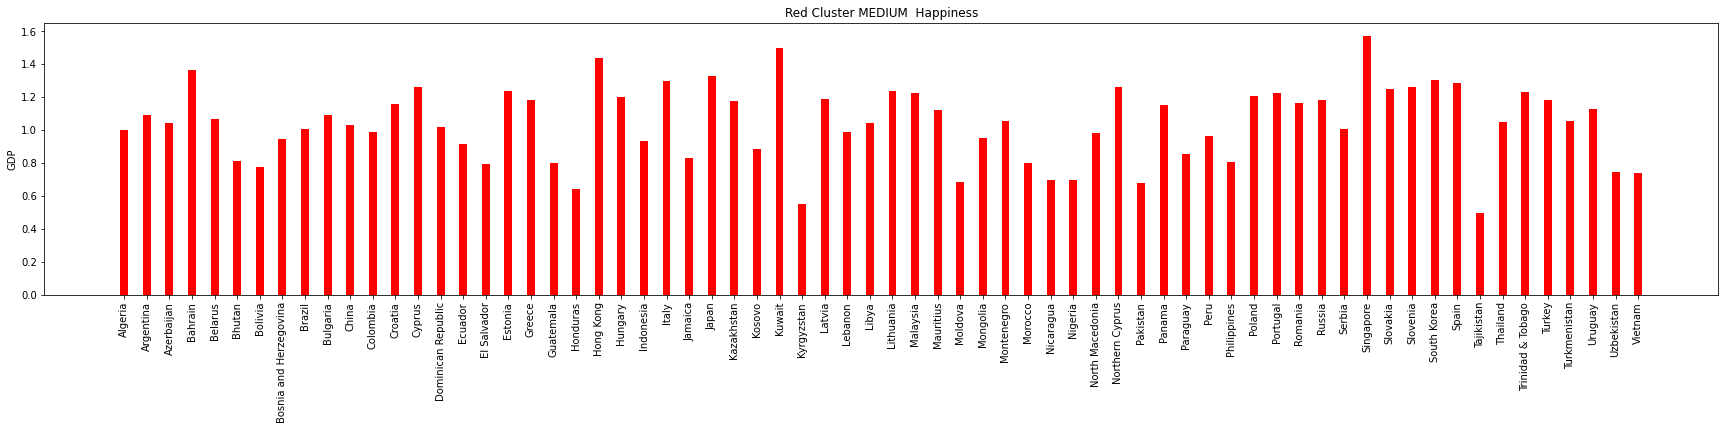

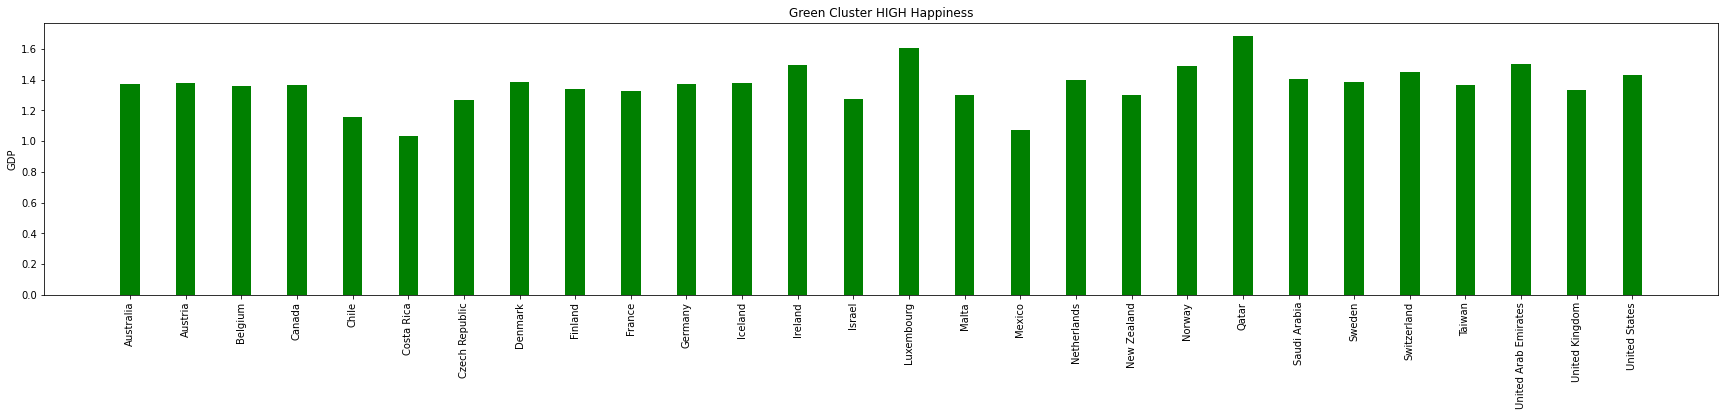

In [ ]:
#BLUE
labels = data_blue_gdp['Country or region']
GDP = data_blue_gdp['GDP per capita']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='GDP')

ax.set_ylabel('GDP')
ax.set_title('Blue Cluster Lower Happiness')

#RED

labels = data_red_gdp['Country or region']
GDP = data_red_gdp['GDP per capita']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='GDP', color='red')
ax.set_ylabel('GDP')
ax.set_title('Red Cluster MEDIUM  Happiness')

#GREEN

labels = data_green_gdp['Country or region']
GDP = data_green_gdp['GDP per capita']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='GDP',  color='green')

ax.set_ylabel('GDP')
ax.set_title('Green Cluster HIGH Happiness')


plt.show()

In [ ]:
data_red_ss

,Overall rank,Country or region,Continent,Perceptions of corruption,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Score
87,88,Algeria,Africa,0.114,1.002,1.160,0.785,0.086,0.073,5.211
46,47,Argentina,South America,0.050,1.092,1.432,0.881,0.471,0.066,6.086
89,90,Azerbaijan,Asia,0.182,1.043,1.147,0.769,0.351,0.035,5.208
36,37,Bahrain,Asia,0.110,1.362,1.368,0.871,0.536,0.255,6.199
80,81,Belarus,Europe,0.142,1.067,1.465,0.789,0.235,0.094,5.323
...,...,...,...,...,...,...,...,...,...,...
78,79,Turkey,Asia,0.106,1.183,1.360,0.808,0.195,0.083,5.373
86,87,Turkmenistan,Asia,0.028,1.052,1.538,0.657,0.394,0.244,5.247
32,33,Uruguay,South America,0.150,1.124,1.465,0.891,0.523,0.127,6.293
40,41,Uzbekistan,Asia,0.240,0.745,1.529,0.756,0.631,0.322,6.174


### Graph Countries by SS

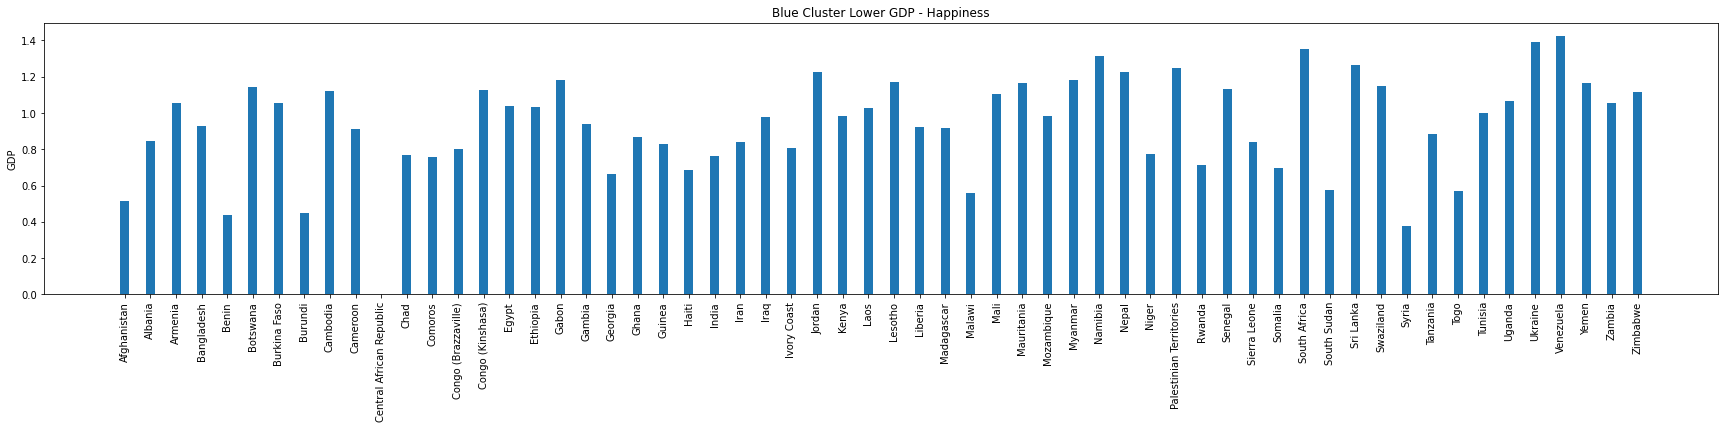

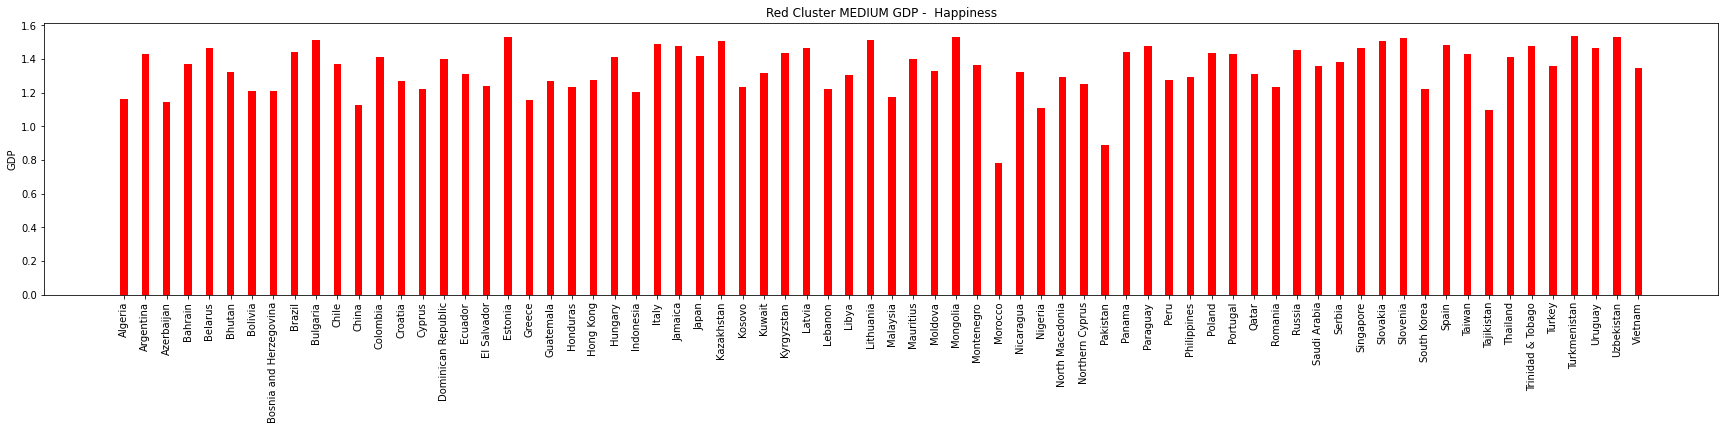

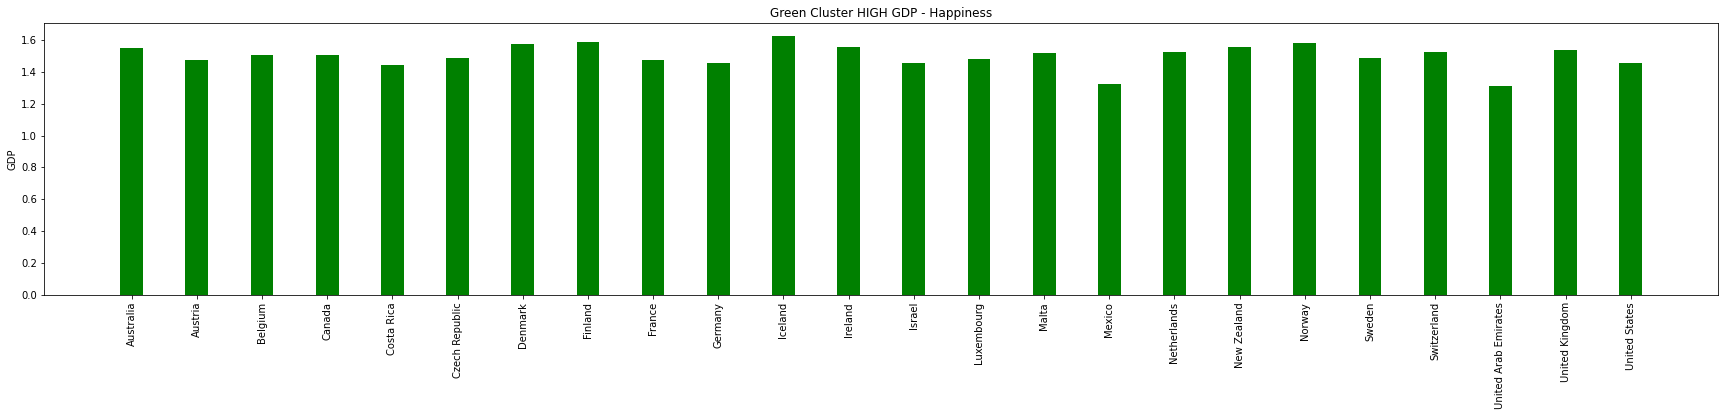

In [ ]:
#BLUE
labels = data_blue_ss['Country or region']
GDP = data_blue_ss['Social support']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='GDP')

ax.set_ylabel('GDP')
ax.set_title('Blue Cluster Lower GDP - Happiness')

#RED

labels = data_red_ss['Country or region']
GDP = data_red_ss['Social support']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='GDP', color='red')
ax.set_ylabel('GDP')
ax.set_title('Red Cluster MEDIUM GDP -  Happiness')

#GREEN

labels = data_green_ss['Country or region']
GDP = data_green_ss['Social support']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(rotation=90)

ax.bar(labels,GDP, width,  label='GDP',  color='green')

ax.set_ylabel('GDP')
ax.set_title('Green Cluster HIGH GDP - Happiness')


plt.show()

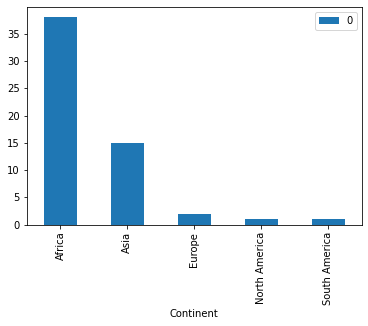

In [ ]:
count.plot.bar()

### Continents in each Cluster

In [ ]:
#BLUE
values = dict(aumont = data_blue_ss.groupby('Continent').size())
count = pd.DataFrame.from_dict(values)
print("\n",data_blue_ss.groupby('Continent').size())

#RED
values = dict(aumont  = data_red_ss.groupby('Continent').size())
count = pd.DataFrame.from_dict(values)
print("\n",data_red_ss.groupby('Continent').size())

#GREEN
values = dict(aumont  = data_green_ss.groupby('Continent').size())
count = pd.DataFrame.from_dict(values)
print("\n",data_green_ss.groupby('Continent').size())


 Continent
Africa           38
Asia             15
Europe            2
North America     1
South America     1
dtype: int64

 Continent
Africa            5
Asia             28
Europe           21
North America     7
South America     9
dtype: int64

 Continent
Asia              2
Europe           16
North America     4
Oceania           2
dtype: int64


## Comparing Result by GDP and SS in NA

In [ ]:
pd.concat([data_red_gdp,data_red_ss]).drop_duplicates(keep=False)

,Overall rank,Country or region,Continent,Perceptions of corruption,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Score
25,26,Chile,South America,0.056,1.159,1.369,0.920,0.357,0.187,6.444
28,29,Qatar,Asia,0.167,1.684,1.313,0.871,0.555,0.220,6.374
27,28,Saudi Arabia,Asia,0.132,1.403,1.357,0.795,0.439,0.080,6.375
24,25,Taiwan,Asia,0.097,1.368,1.430,0.914,0.351,0.242,6.446


In [ ]:
pd.concat([data_green_gdp,data_green_ss]).drop_duplicates(keep=False)

,Overall rank,Country or region,Continent,Perceptions of corruption,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Score
25,26,Chile,South America,0.056,1.159,1.369,0.920,0.357,0.187,6.444
28,29,Qatar,Asia,0.167,1.684,1.313,0.871,0.555,0.220,6.374
27,28,Saudi Arabia,Asia,0.132,1.403,1.357,0.795,0.439,0.080,6.375
24,25,Taiwan,Asia,0.097,1.368,1.430,0.914,0.351,0.242,6.446


### Top Happy Countries LATAM

In [ ]:
df_latam.sort_values(by="Score", ascending=False).head(10)

,Overall rank,Country or region,Continent,Perceptions of corruption,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Score
8,9,Canada,North America,0.308,1.365,1.505,1.039,0.584,0.285,7.278
11,12,Costa Rica,North America,0.093,1.034,1.441,0.963,0.558,0.144,7.167
18,19,United States,North America,0.128,1.433,1.457,0.874,0.454,0.280,6.892
22,23,Mexico,North America,0.073,1.070,1.323,0.861,0.433,0.074,6.595
25,26,Chile,South America,0.056,1.159,1.369,0.920,0.357,0.187,6.444
26,27,Guatemala,North America,0.078,0.800,1.269,0.746,0.535,0.175,6.436
30,31,Panama,North America,0.054,1.149,1.442,0.910,0.516,0.109,6.321
31,32,Brazil,South America,0.086,1.004,1.439,0.802,0.390,0.099,6.300
32,33,Uruguay,South America,0.150,1.124,1.465,0.891,0.523,0.127,6.293
34,35,El Salvador,North America,0.074,0.794,1.242,0.789,0.430,0.093,6.253


### Comparing Latam Countries

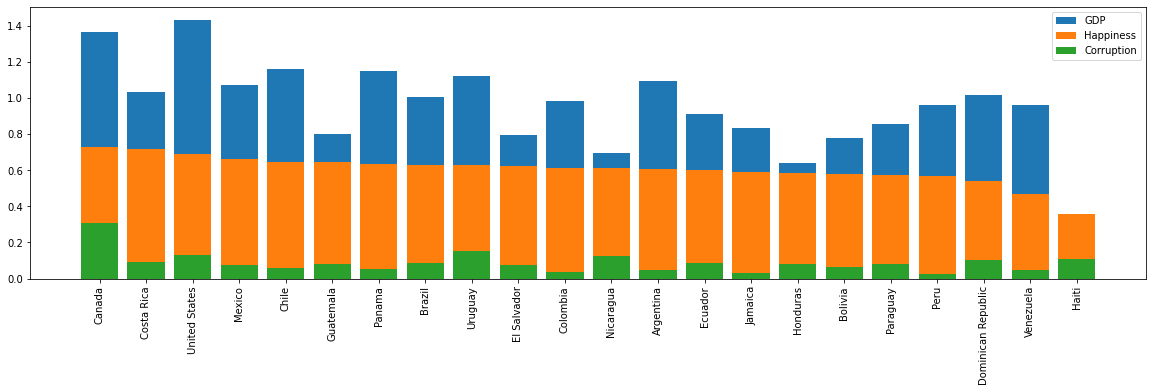

In [ ]:
df_latam = df[(df['Continent']=="North America") | (df['Continent']=="South America")]
fig, ax = plt.subplots(figsize=(20,5))

plt.bar(df_latam['Country or region'], df_latam['GDP per capita'], label='GDP')
plt.bar(df_latam['Country or region'], df_latam['Score']/10, label='Happiness')
plt.bar(df_latam['Country or region'], df_latam['Perceptions of corruption'], label='Corruption')


plt.xticks(rotation=90)


plt.legend()
plt.show()

### Countries in Clusters

In [ ]:
d15 = pd.read_csv('2015.csv')
d16 = pd.read_csv('2016.csv')
d17 = pd.read_csv('2017.csv')
d18 = pd.read_csv('2018.csv')
d19 = pd.read_csv('2019.csv')

d15['Year'] = '2015'
d16['Year'] = '2016'
d17['Year'] = '2017'
d18['Year'] = '2018'
d19['Year'] = '2019'

# print(d15.columns)
# print(d16.columns)
# print(d17.columns)
# print(d18.columns)
# print(d19.columns)

d15 = d15.iloc[:,[0,3,5,9,-1]]
d16 = d16.iloc[:,[0,3,6,10,-1]]
d17 = d17.iloc[:,[0,2,5,10,-1]]
d18 = d18.iloc[:,[1,2,3,8,-1]]
d19 = d19.iloc[:,[1,2,3,8,-1]]

col_names = ['country','happiness','gdp','corruption','year']
d15.columns= col_names
d16.columns = col_names
d17.columns = col_names
d18.columns = col_names
d19.columns = col_names

In [ ]:
all_years = pd.concat([d15, d16, d17, d18, d19],ignore_index=True)
all_years['continent'] = all_years['country'].apply(get_continent)
all_years['happiness'] = all_years['happiness']/100
all_years['gdp'] = all_years['gdp']/10

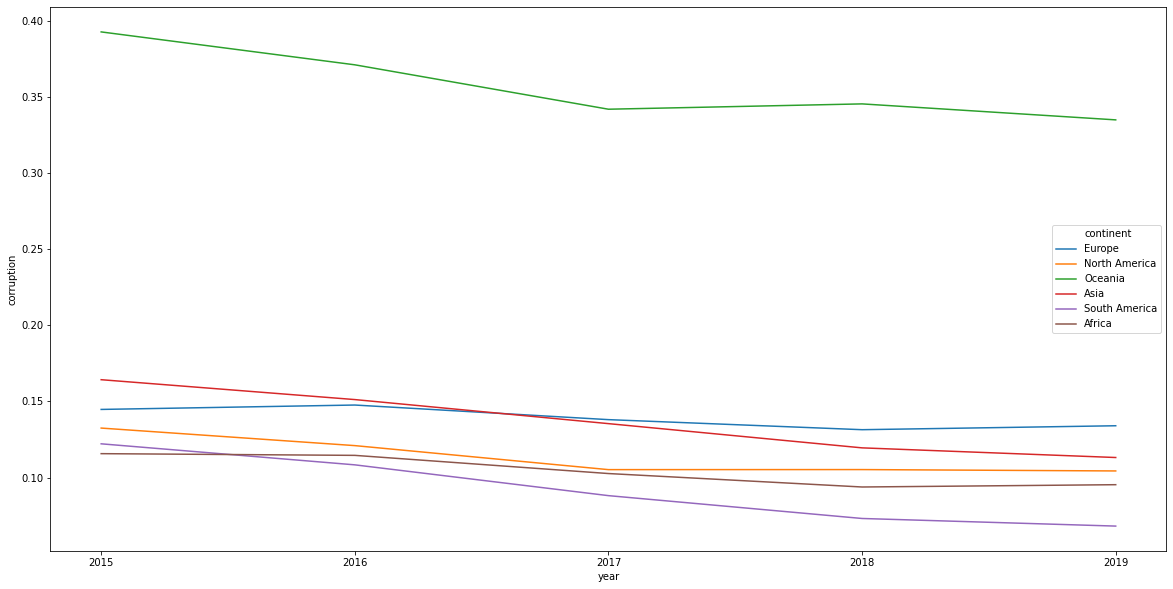

In [ ]:
fig = plt.subplots(figsize=(20,10))
sn.lineplot(data=all_years, x="year", y="corruption", hue="continent", ci=None)

## Panama Over Time

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Panama GDP and Corruption')]

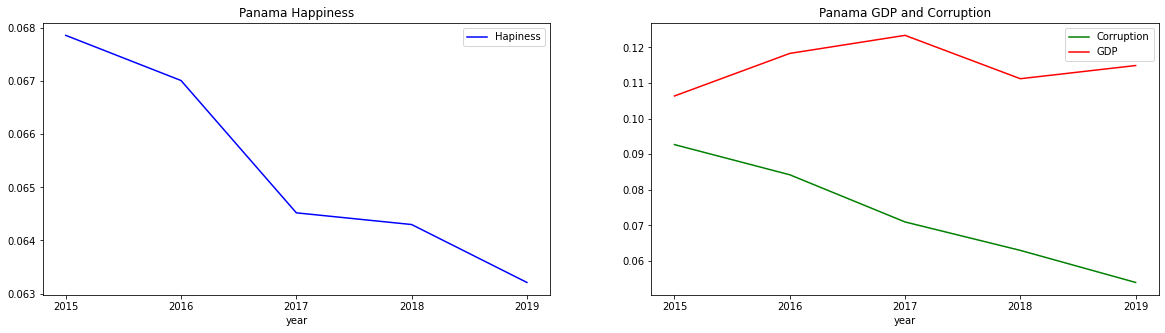

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,5))


sn.lineplot(data=all_years[all_years['country']=="Panama"], x="year", y="happiness", ci=None, color="blue", label="Hapiness",ax=ax1 )
ax1.set(ylabel=None,title="Panama Happiness")


sn.lineplot(data=all_years[all_years['country']=="Panama"], x="year", y="corruption", ci=None, color="green", label = "Corruption",ax=ax2)
sn.lineplot(data=all_years[all_years['country']=="Panama"], x="year", y="gdp", ci=True, color="red", label = "GDP",ax=ax2)
ax2.set(ylabel=None)
ax2.set(ylabel=None,title="Panama GDP and Corruption")

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Costa Rica GDP and Corruption')]

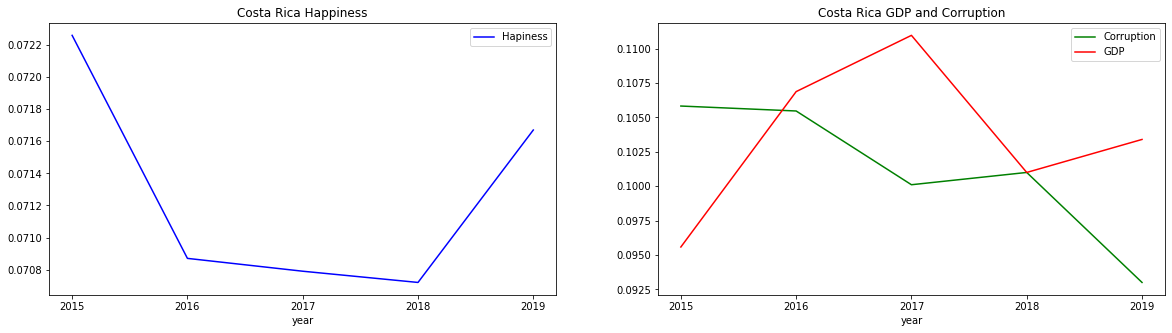

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,5))


sn.lineplot(data=all_years[all_years['country']=="Costa Rica"], x="year", y="happiness", ci=None, color="blue", label="Hapiness",ax=ax1 )
ax1.set(ylabel=None,title="Costa Rica Happiness")


sn.lineplot(data=all_years[all_years['country']=="Costa Rica"], x="year", y="corruption", ci=None, color="green", label = "Corruption",ax=ax2)
sn.lineplot(data=all_years[all_years['country']=="Costa Rica"], x="year", y="gdp", ci=True, color="red", label = "GDP",ax=ax2)
ax2.set(ylabel=None)
ax2.set(ylabel=None,title="Costa Rica GDP and Corruption")

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Canada GDP ')]

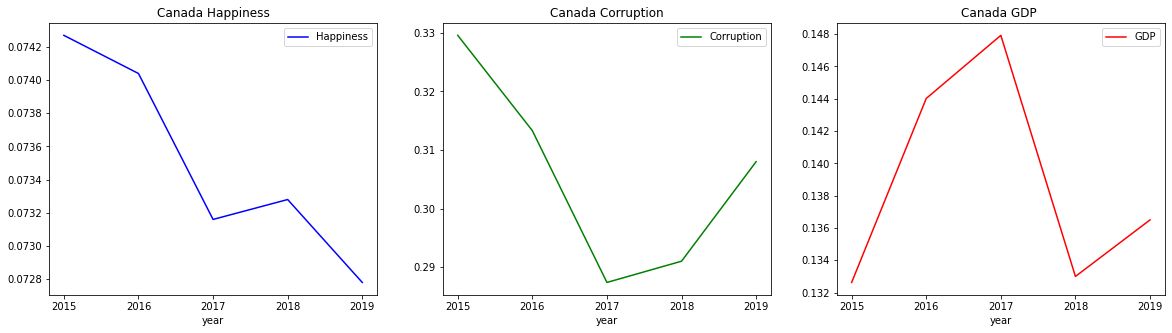

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))


sn.lineplot(data=all_years[all_years['country']=="Canada"], x="year", y="happiness", ci=None, color="blue", label="Happiness",ax=ax1 )
ax1.set(ylabel=None,title="Canada Happiness")


sn.lineplot(data=all_years[all_years['country']=="Canada"], x="year", y="corruption", ci=None, color="green", label = "Corruption",ax=ax2)
ax2.set(ylabel=None)
ax2.set(ylabel=None,title="Canada Corruption")


sn.lineplot(data=all_years[all_years['country']=="Canada"], x="year", y="gdp", ci=True, color="red", label = "GDP",ax=ax3)
ax3.set(ylabel=None)
ax3.set(ylabel=None,title="Canada GDP ")

[Text(0, 0.5, ''), Text(0.5, 1.0, 'USA GDP and Corruption')]

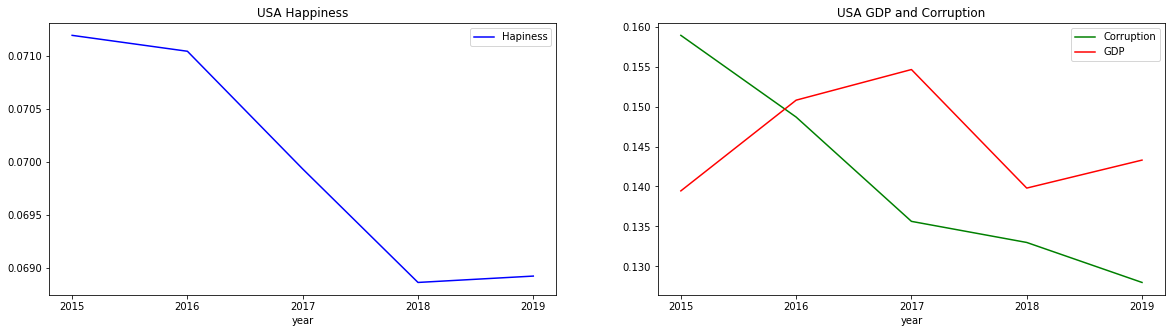

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,5))


sn.lineplot(data=all_years[all_years['country']=="United States"], x="year", y="happiness", ci=None, color="blue", label="Hapiness",ax=ax1 )
ax1.set(ylabel=None,title="USA Happiness")


sn.lineplot(data=all_years[all_years['country']=="United States"], x="year", y="corruption", ci=None, color="green", label = "Corruption",ax=ax2)
sn.lineplot(data=all_years[all_years['country']=="United States"], x="year", y="gdp", ci=True, color="red", label = "GDP",ax=ax2)
ax2.set(ylabel=None)
ax2.set(ylabel=None,title="USA GDP and Corruption")


